# 1. Problem
.
Stroke ranks as the second-leading cause of death globally and stands as the primary cause of disability. With the World Health Organization (WHO) estimating that one in four individuals may encounter a stroke during their lifetime, irrespective of age, we have focused our attention on this dataset. Due to thesudden nature of strokes, our aim is to delve into the data to discern potential risk factors and demographics associated with stroke occurrences. By analyzing this dataset, we seek to provide insights into the types of individuals who are more susceptible to strokes, facilitating proactive lifestyle changes and interventions. The dataset encompasses various input parameters such as gender, age, BMI, hypertension and heart disease status, smoking habits, marital status, and residence type, all of which are used to predict the likelihood of a patient experiencing a stroke. Each entry in the dataset furnishes pertinent details about the patient under consideration.

# 2. Data Mining Task 

Data mining plays a pivotal role in predicting the likelihood of stroke occurrence through both classification and clustering techniques. By applying data mining algorithms to extensive datasets containing various health-related attributes, significant patterns and correlations can be unearthed. In the realm of classification, data mining facilitates the construction of models capable of accurately categorizing individuals into distinct groups, such as labeling them as either “stroke” or “non-stroke,” based on their unique attributes and risk profiles. This classification process aids in pinpointing individuals at higher risk of experiencing a stroke, thus enabling proactive interventions and preventive measures.

Conversely, clustering techniques contribute to identifying clusters or cohorts of individuals sharing similar characteristics. This approach allows for a nuanced exploration of stroke risk factors and potential subgroups within the population. By leveraging data mining for stroke prediction, healthcare professionals and researchers can access invaluable insights, paving the way for the development of effective strategies for stroke prevention, early detection, and personalized treatments.

# 3. Data

#### 3.1 Dataset:
Our dataset source is Kaggle : <https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset>

#### 3.2 Genral info about the dataset:
Among the 500 objects in our dataset sample, 12 attributes are used to describe them. 

 the class label for our dataset is Stroke hat took two values 1 and 0 to indicate whether they are sufferd from it or not.

In [1]:
import pandas as pd
df = pd.read_csv("StrokeDS.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    int64  
 1   gender             500 non-null    object 
 2   age                500 non-null    float64
 3   hypertension       500 non-null    int64  
 4   heart_disease      500 non-null    int64  
 5   ever_married       500 non-null    object 
 6   work_type          500 non-null    object 
 7   Residence_type     500 non-null    object 
 8   avg_glucose_level  500 non-null    float64
 9   bmi                455 non-null    float64
 10  smoking_status     500 non-null    object 
 11  stroke             500 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 37.2+ KB
None


##### data types:


| Attributes name   | Description                                                 | Data type | Rangee values     
|-------------------|-------------------------------------------------------------|-----------|-----------------
| id                | Unique id of the patient                                    | Nominal   | 
| gender            | Gender of the patient                                       | Binary    | 
| age               | Age of the patient                                          | Numeric   | Range between 0.08- 82
| hypertension      | 1 means the patient has hypertension,0 means they do not.   | Binary    | 0,1
| heart_disease     | 1 means the patient has heart disease,0 means they do not.  | Binary    | 0,1
| ever_married      | Has the patient ever been married?                          | Binary    | yes,no
| work_type         | Work type of the patient                                    | Nominal   | “Private”, “Self-employed”, “children”, “Govt_job”, “Never_worked”
| residence_type    | Residence type of the patient                               | Binary    | Urban,Rural
| avg_glucose_level | Average glucose level in blood                              | Numeric   | between 55.1- 272
| bmi               | Body Mass Index                                             | Numeric   | between 10.3- 97.6
| Smoking state     | whether or not smokes                                       | Nominal   | “never smoked”, “Unknown”, “formerly smoked”, “smokes”
| stroke            | 1 means the patient had a stroke, 0 means not               | Binary    | 0,1


##### data distribution:

<ipython-input-7-9b064b8a5eb7>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


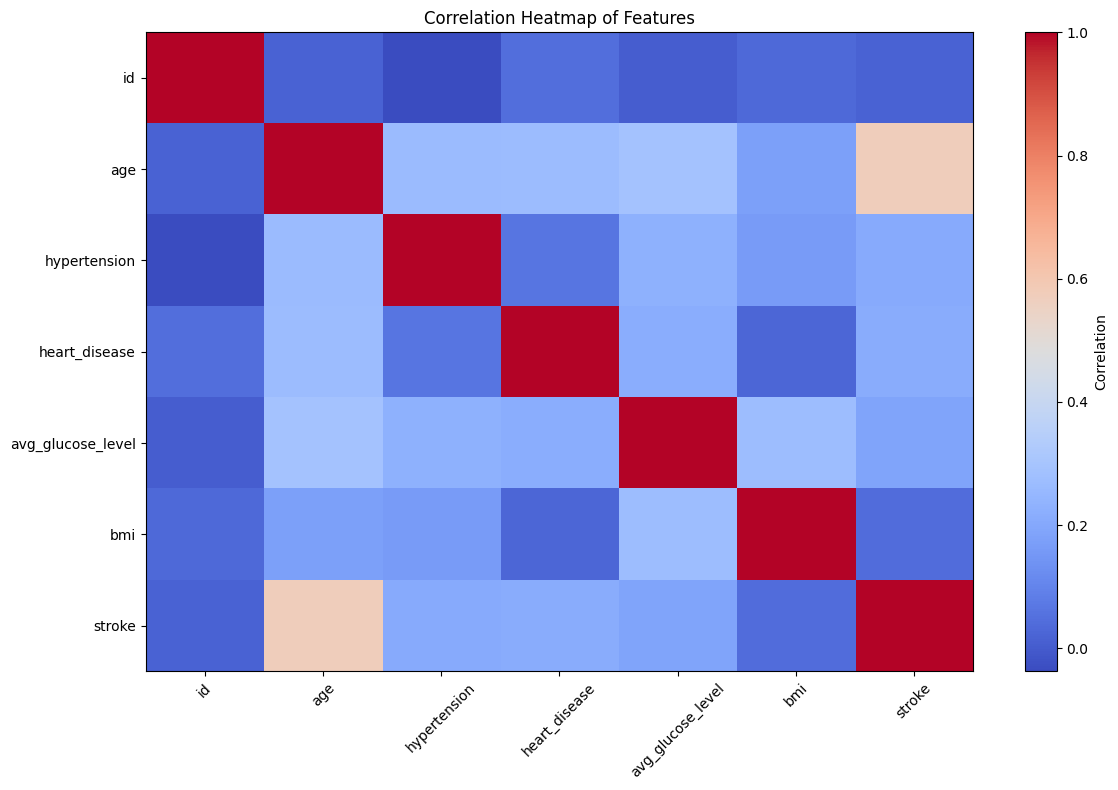

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Correlation')
plt.title('Correlation Heatmap of Features')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.tight_layout()
plt.show()


##### missing values

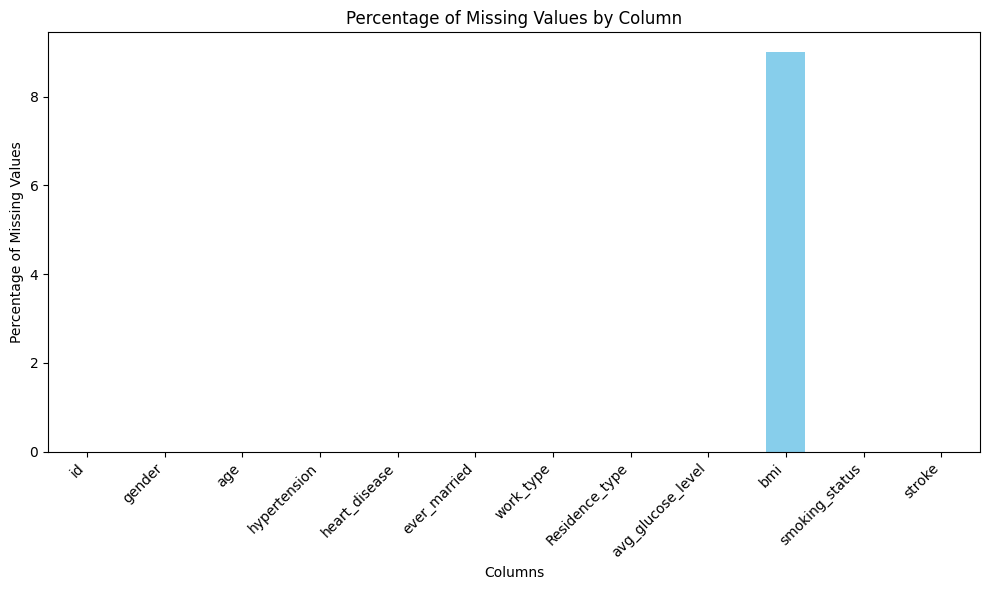

In [8]:

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Drop columns with no missing values
missing_percentage = missing_percentage.dropna()

# Create a bar plot of missing values
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [2]:
print(df)

        id  gender   age  hypertension  heart_disease ever_married  \
0     9046    Male  67.0             0              1          Yes   
1    51676  Female  61.0             0              0          Yes   
2    31112    Male  80.0             0              1          Yes   
3    60182  Female  49.0             0              0          Yes   
4     1665  Female  79.0             1              0          Yes   
..     ...     ...   ...           ...            ...          ...   
495  34299  Female  71.0             0              0          Yes   
496  54375    Male   5.0             0              0           No   
497  37832  Female  14.0             0              0           No   
498  21058  Female  15.0             0              0           No   
499   7696  Female  66.0             0              0           No   

         work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0          Private          Urban             228.69  36.6  formerly smoked   
1

 #### 3.3 statistical measures 

##### 3.3.1 five number summary

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

five_number_summary = numeric_df.describe()
print("Five-number Summary for each numeric column: ")
print(five_number_summary.loc[['min', '25%', '50%', '75%', 'max']])


Five-number Summary for each numeric column: 
           id    age  hypertension  heart_disease  avg_glucose_level    bmi  \
min    129.00   0.64           0.0            0.0            55.3900  13.80   
25%  17303.75  42.00           0.0            0.0            79.1125  25.05   
50%  36404.50  59.00           0.0            0.0            97.8400  28.90   
75%  55712.50  74.00           0.0            0.0           167.2000  34.40   
max  72918.00  82.00           1.0            1.0           271.7400  64.80   

     stroke  
min     0.0  
25%     0.0  
50%     0.0  
75%     1.0  
max     1.0  


##### 3.3.2 outliers

In [11]:
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)

# Calculate the Interquartile Range (IQR) for each numeric column
IQR = Q3 - Q1

# Determine outliers for each numeric column
# A data point is considered an outlier if it is below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR)
outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))

# Print the outliers
print("Outliers in the dataset:")
print(numeric_df[outliers])

# Optionally, you can filter to see only the rows with at least one outlier
outlier_rows = numeric_df[outliers.any(axis=1)]
print("\nRows with at least one outlier:")
print(outlier_rows)

Outliers in the dataset:
     id  age  hypertension  heart_disease  avg_glucose_level  bmi  stroke
0   NaN  NaN           NaN            1.0                NaN  NaN     NaN
1   NaN  NaN           NaN            NaN                NaN  NaN     NaN
2   NaN  NaN           NaN            1.0                NaN  NaN     NaN
3   NaN  NaN           NaN            NaN                NaN  NaN     NaN
4   NaN  NaN           1.0            NaN                NaN  NaN     NaN
..   ..  ...           ...            ...                ...  ...     ...
495 NaN  NaN           NaN            NaN                NaN  NaN     NaN
496 NaN  NaN           NaN            NaN                NaN  NaN     NaN
497 NaN  NaN           NaN            NaN                NaN  NaN     NaN
498 NaN  NaN           NaN            NaN                NaN  NaN     NaN
499 NaN  NaN           NaN            NaN                NaN  NaN     NaN

[500 rows x 7 columns]

Rows with at least one outlier:
        id   age  hypertension

##### 3.3.3 box plot

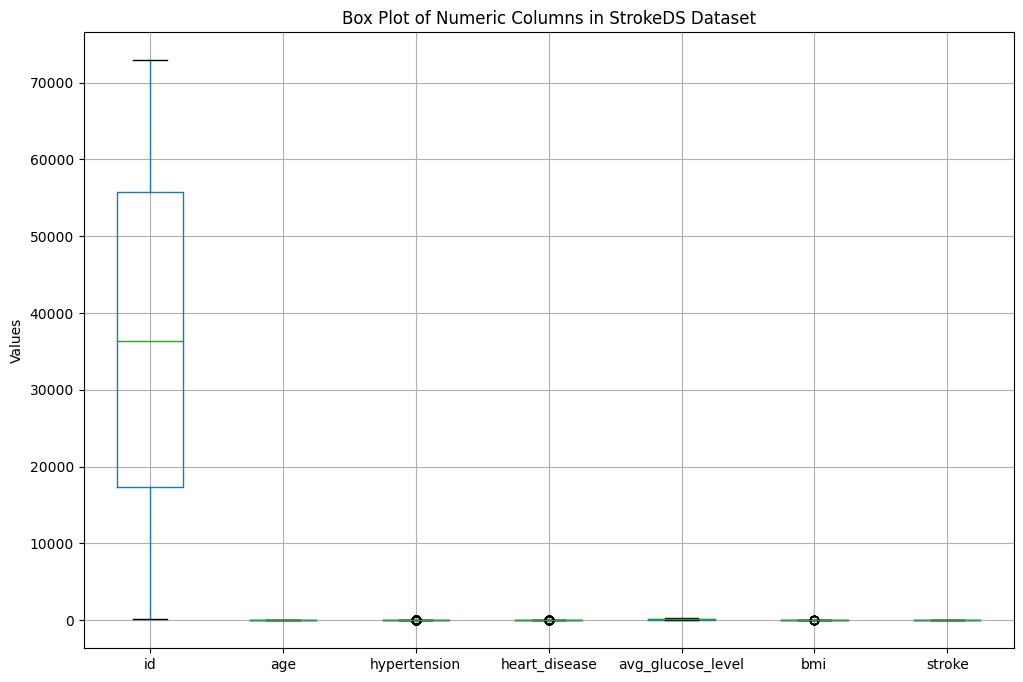

In [10]:
plt.figure(figsize=(12, 8))
numeric_df.boxplot()
plt.title('Box Plot of Numeric Columns in StrokeDS Dataset')
plt.ylabel('Values')
plt.show()

#### 3.4 plots:

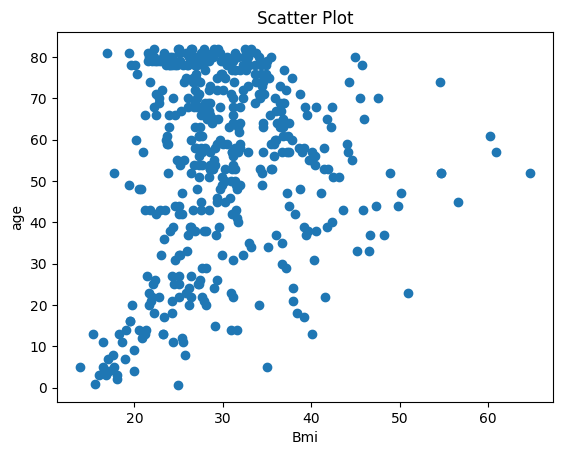

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('StrokeDS.csv')
x = data['bmi']
y = data['age']

plt.scatter(x, y)
plt.xlabel("Bmi")
plt.ylabel("age")

plt.title("Scatter Plot")
plt.show()

this Scatter plot suggest a concentration of certain BMI ranges within specific age groups. also a positive correlation emerged, suggesting that as age increases, the bmi also increase. However, the data exhibited a spread, indicating that not all patients with higher BMI will have a stroke. we need to handel the Outliers. 


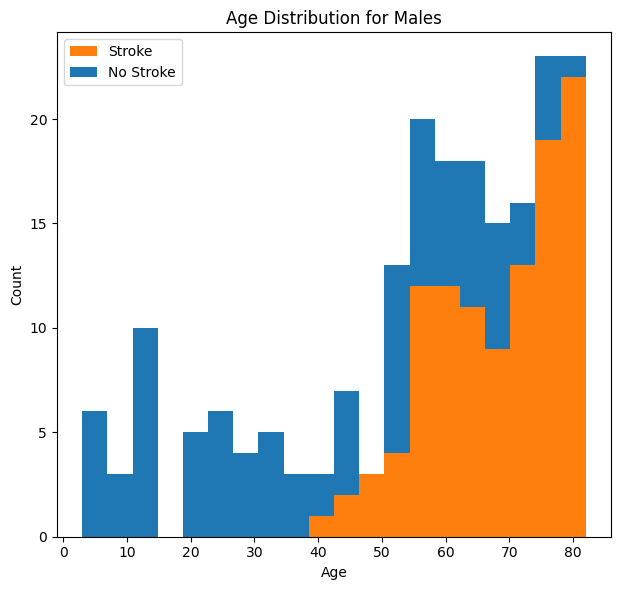

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('StrokeDS.csv')

# Filter out 'Other' genders if present
data = data[data['gender'] != 'Other']

# Set up the plot
plt.figure(figsize=(12, 6))

# Histograms for males
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
male_data = data[data['gender'] == 'Male']
plt.hist([male_data[male_data['stroke'] == 1]['age'], male_data[male_data['stroke'] == 0]['age']],
         bins=20, stacked=True, color=['#ff7f0e', '#1f77b4'], label=['Stroke', 'No Stroke'])
plt.title('Age Distribution for Males')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()


# Show the plot
plt.tight_layout()
plt.show()


This graph focused on the age distribution of males, with separate lines for stroke and no-stroke occurrences. Both lines curved upwards, indicating that the number of people experiencing strokes and those who don't tend to increase with age. The data might be imbalanced and has missing values.

<Figure size 1000x600 with 0 Axes>

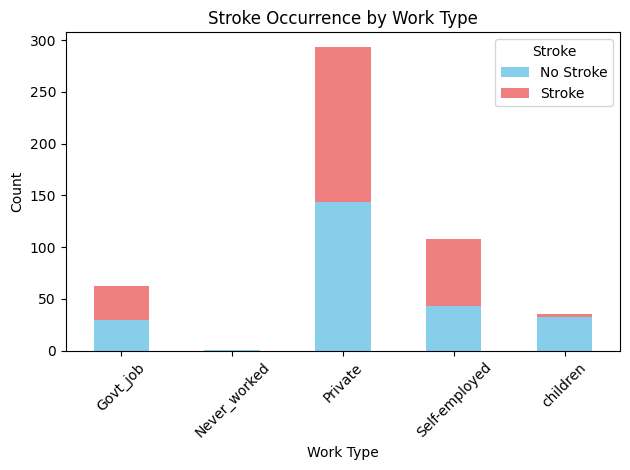

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('StrokeDS.csv')
# Assuming 'data' is your DataFrame and 'work_type' and 'stroke' are the columns of interest
work_stroke_counts = data.groupby('work_type')['stroke'].value_counts().unstack(fill_value=0)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
work_stroke_counts.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.title('Stroke Occurrence by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotates the labels on the x-axis to avoid overlap
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.tight_layout()
plt.show()


This plot reveals the proportion of stroke occurrences among individuals with different work types, A higher percentage of strokes among private employees compared to government job holders. category "children" (if present) might not be directly relevant to predicting stroke risk. You could consider removing 

# 4. Data preprocessing

In our data, we performed several data preprocessing techniques such as data cleaning, data normalization, removing outliers and null values, etc. We’ll go through each one in details below.


In [60]:
Data = pd.read_csv("StrokeDS.csv")
print(Data)

        id  gender   age  hypertension  heart_disease ever_married  \
0     9046    Male  67.0             0              1          Yes   
1    51676  Female  61.0             0              0          Yes   
2    31112    Male  80.0             0              1          Yes   
3    60182  Female  49.0             0              0          Yes   
4     1665  Female  79.0             1              0          Yes   
..     ...     ...   ...           ...            ...          ...   
495  34299  Female  71.0             0              0          Yes   
496  54375    Male   5.0             0              0           No   
497  37832  Female  14.0             0              0           No   
498  21058  Female  15.0             0              0           No   
499   7696  Female  66.0             0              0           No   

         work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0          Private          Urban             228.69  36.6  formerly smoked   
1

### 4.1 Data Cleaning 

Null values can cause issues when performing data analysis or building machine learning models, as they can lead to inaccurate results or errors, therefore we are will look for the missing values and nan values, and it occur that bmi column is what we are going to handel by mean 

In [65]:
import pandas as pd


# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [47]:
###finding the missing values 
import pandas as pd

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    int64  
 1   gender             500 non-null    int32  
 2   age                500 non-null    float64
 3   hypertension       500 non-null    int64  
 4   heart_disease      500 non-null    int64  
 5   ever_married       500 non-null    int32  
 6   work_type          500 non-null    int32  
 7   Residence_type     500 non-null    int32  
 8   avg_glucose_level  500 non-null    float64
 9   bmi                455 non-null    float64
 10  smoking_status     500 non-null    int32  
 11  stroke             500 non-null    int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 37.2 KB


In [48]:

nan_counts = df.isna().sum()

# Print the columns that have NaN values and their counts
print(nan_counts[nan_counts > 0])

bmi    45
dtype: int64


In [49]:
specific_column = df['bmi']
print("Before :")
print(specific_column)

Before :
0      36.6
1       NaN
2      32.5
3      34.4
4      24.0
       ... 
495    34.7
496    35.0
497    21.3
498    29.1
499    23.9
Name: bmi, Length: 500, dtype: float64


In [50]:

import pandas as pd

numeric_columns = ['bmi'] 
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())


to remove the Nan

In [63]:
df_imputed = df.fillna(df.mean())

In [52]:
specific_column = df['bmi']
print("After :")
print(specific_column)

After :
0      36.600000
1      30.132527
2      32.500000
3      34.400000
4      24.000000
         ...    
495    34.700000
496    35.000000
497    21.300000
498    29.100000
499    23.900000
Name: bmi, Length: 500, dtype: float64


In [53]:
import pandas as pd
from scipy import stats
import numpy as np

# Function
def find_outliers(df):
    outlier_dict = {}
    for column in df.select_dtypes(include=[np.number]):  # This ensures we're only checking numeric columns
        if df[column].isna().any():
            df[column].fillna(df[column].median(), inplace=True)  # Handling NaNs by median imputation
        z_scores = np.abs(stats.zscore(df[column]))
        threshold = 3
        outliers = np.where(z_scores > threshold)
        if outliers[0].size > 0:
            outlier_dict[column] = len(outliers[0])
    return outlier_dict

# Checking for outliers
outliers = find_outliers(data)
print("Columns with outliers and their count:")
for column, count in outliers.items():
    print(f"{column}: {count} outliers")


Columns with outliers and their count:
bmi: 7 outliers


there is some outliers in bmi columns we are going to remove them 

In [54]:
import pandas as pd

# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df = remove_outliers(df, 'bmi')


### 4.2 Data integration

Since our dataset contains all the relevant information we need for analysis and modeling,
there is no need for data integration.


### 4.3 Data Transforamtion 

Encoding is an important step in data mining and machine learning tasks because it transforms raw data into a suitable format that can be effectively processed and analyzed by algorithms. The process of encoding involves converting categorical or textual data into numerical representations. In this step we want to encode the nominal columns such as work type, gender, erver marriedm residence type and smoking status 


In [57]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from scipy import stats



le = LabelEncoder()


df['work_type'] = le.fit_transform(df['work_type'])
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])


print(df)


        id  gender   age  hypertension  heart_disease  ever_married  \
0     9046       1  67.0             0              1             1   
1    51676       0  61.0             0              0             1   
2    31112       1  80.0             0              1             1   
3    60182       0  49.0             0              0             1   
4     1665       0  79.0             1              0             1   
..     ...     ...   ...           ...            ...           ...   
495  34299       0  71.0             0              0             1   
496  54375       1   5.0             0              0             0   
497  37832       0  14.0             0              0             0   
498  21058       0  15.0             0              0             0   
499   7696       0  66.0             0              0             0   

     work_type  Residence_type  avg_glucose_level        bmi  smoking_status  \
0            2               1             228.69  36.600000       

### 4.4 Data Reduction

since the datasets columns are not highly correlated with each other, reducing the dimensionality of the dataset may not be necessary. 

### 4.5 Feature Selection

we will use a feature selection tool called recursive feature elimination (RFE) to reduce the number of input variables in a predictive model. This is a widely used algorithm to select the most relevant features for prediction of the prediction target variable

In [34]:


from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
X = df.drop('stroke', axis=1)  
y = df['stroke']
X = pd.get_dummies(X)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=7)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000) 
rfe = RFE(model, n_features_to_select=2) 
X_train_selected = rfe.fit_transform(X_train_scaled, y_train)
X_test_selected = rfe.transform(X_test_scaled)


selected_features = [feature for feature, selected in zip(X.columns, rfe.support_) if selected]
print("Selected features:", selected_features)


Selected features: ['age', 'heart_disease']


This means indicates that the feature selection process has identified the features 'age' and 'heart_disease' as the most important or relevant features for predicting the target variable (in this case, the likelihood of stroke).

In [58]:
print(df)

        id  gender   age  hypertension  heart_disease  ever_married  \
0     9046       1  67.0             0              1             1   
1    51676       0  61.0             0              0             1   
2    31112       1  80.0             0              1             1   
3    60182       0  49.0             0              0             1   
4     1665       0  79.0             1              0             1   
..     ...     ...   ...           ...            ...           ...   
495  34299       0  71.0             0              0             1   
496  54375       1   5.0             0              0             0   
497  37832       0  14.0             0              0             0   
498  21058       0  15.0             0              0             0   
499   7696       0  66.0             0              0             0   

     work_type  Residence_type  avg_glucose_level        bmi  smoking_status  \
0            2               1             228.69  36.600000       

 # 5. Data Mining Technique


We conducted both supervised and unsupervised learning on our dataset, utilizing classification and clustering techniques. For classification, we employed a decision tree algorithm, which constructs a tree recursively with leaf nodes representing final decisions. Our objective was to predict the class label "stroke," categorized as "yes" or "no." The prediction relied on selected attributes derived from feature selection results, including "ever_married," "hypertension," "avg_glucose," and "age."

The classification process involved dividing the dataset into two subsets: the training dataset, used to construct the decision tree model, and the testing dataset, employed to evaluate the model's performance. To assess the effectiveness of our model, we utilized a confusion matrix and measured both accuracy and cost-sensitive metrics on the dataset.

For clustering, as it's an unsupervised learning technique, we removed the class label. We utilized the k-means approach clustering algorithm, which divides our data into groups with high intra-class similarity and low inter-class similarity. This algorithm iteratively updates cluster centroids based on the Euclidean distance, selecting random centers and assigning each object to the cluster with the nearest center.

We opted for k-means clustering due to its suitability for large datasets and its simplicity compared to other algorithms. By using the same set of attributes for both clustering and classification, we aimed to effectively compare the results and assess the similarities or differences in the identified patterns. This comparison provides valuable insights into the effectiveness of each method for analyzing and categorizing the data. Therefore, we utilized the same attributes as those used in classification.

We used the DecisionTreeClassifier for constructing a decision tree model to classify our data into categories, ConfusionMatrixDisplay was utilized to visually represent the confusion matrix, used the StandardScaler to standardize the features of our dataset makes the data more comparable and compatible for clustering, KMeans for clustering the dataset into groups (clusters) that consist of similar data points, scale to standardize our dataset quickly by centering to mean and scaling to unit variance. SilhouetteVisualizer to  determine the degree of separation between clusters.

# 6. Evaluation and Comparison

#### 6.1 Classifiction:



our classification task aims to predict the likelihood of a patient experiencing a stroke based on various health-related attributes. by utilized decision trees with different partitions of training and testing data, evaluating the model's performance with accuracy, precision, recall. Using criteria such as entropy and Gini index for creating the decision trees allowed for a model performance comparison under different attribute selection strategies.

we Applyed Decision trees classification in three different sizes of partitions:
- 80% training, 20% testing
- 70% training, 30% testing
- 90% training, 10% testing

Based on the analysis of the three different training sets while the size increases from 70% to 90%, there is a clear improvement in accuracy, precision, and recall. This suggests that a larger dataset provides a more robust representation of the complexities and variability inherent in your data, allowing the model to establish more accurate and generalized rules.

on the other hand the consistency in performance metrics across different partitions when using entropy suggests that the model is stable and maintains its performance despite changes in data volume, indicating good model robustness.


|              |   IG                                 |   IG                                |   IG           |   
|--------------|--------------------------------------|-------------------------------------|---------------------|
| Accuracy     |    0.6                               |  0.6733                             |     0.67       | 
|              | training= 80%    testing=20%         |training= 70%   testing=30%         |training= 90%    testing=10%         |



|              |   Gini index                                |   Gini index                               |   Gini index           |   
|--------------|--------------------------------------|-------------------------------------|---------------------|
| Accuracy     |    0.6                               |  0.6733                             |     0.67       | 
|              | training= 80%    testing=20%         |training= 70%   testing=30%         |training= 90%    testing=10%         |


In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [27]:
df=pd.read_csv('Processed_StrokeDS.csv')
X = df.drop(['id','age','stroke'], axis=1)
y = df['stroke']


Gini Index Results:
Accuracy: 0.7
Confusion Matrix:
 [[19  7]
 [ 8 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.72        26
           1       0.70      0.67      0.68        24

    accuracy                           0.70        50
   macro avg       0.70      0.70      0.70        50
weighted avg       0.70      0.70      0.70        50



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


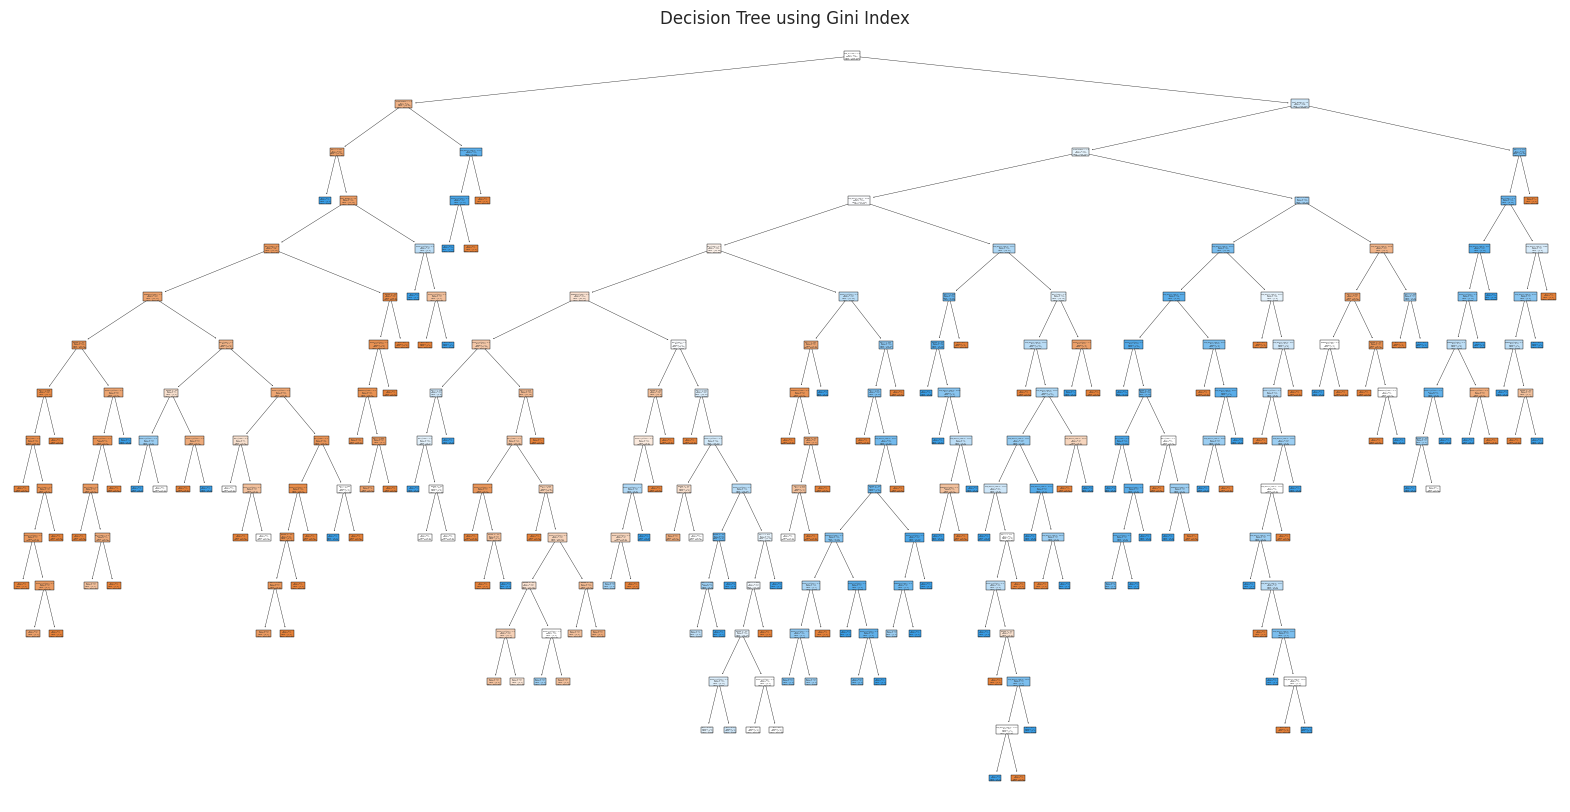

In [35]:

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Instantiate and train the classifier using Gini index
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)

# Predict on the test set
y_pred_gini = clf_gini.predict(X_test)

# Evaluate the model's performance
print("Gini Index Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gini))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gini))
print("Classification Report:\n", classification_report(y_test, y_pred_gini))

plt.figure(figsize=(20,10))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['No Stroke', 'Stroke'])
plt.title('Decision Tree using Gini Index')
plt.show()

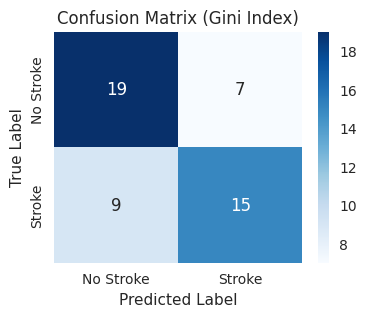

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Instantiate and train the classifier using Gini index
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)

# Predict on the test set
y_pred_gini = clf_gini.predict(X_test)

%pip install matplotlib seaborn

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Gini Index)')
plt.show()

here it has the highest accuracy, the total number of samples in the test set is much smaller, which might not provide a complete picture of the model's general performance. The numbers of false positives and false negatives are relatively low compared to the other scenarios, suggesting that when the model gets it right, it tends to do so confidently, which might be attributed to more training data.


Gini Index Results:
Accuracy: 0.6
Confusion Matrix:
 [[33 21]
 [19 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.61      0.62        54
           1       0.56      0.59      0.57        46

    accuracy                           0.60       100
   macro avg       0.60      0.60      0.60       100
weighted avg       0.60      0.60      0.60       100



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


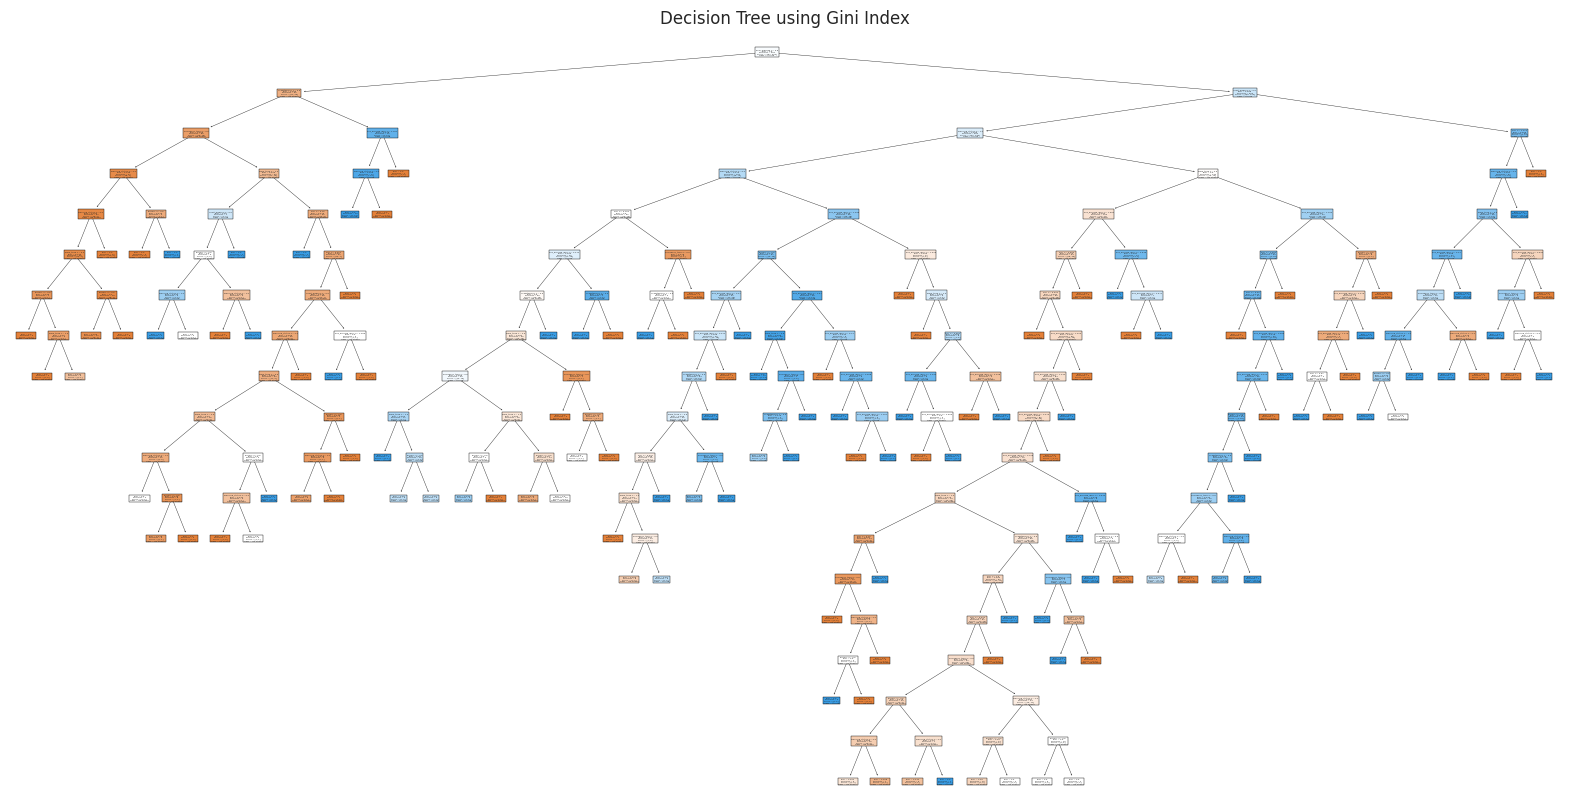

In [36]:

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the classifier using Gini index
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)

# Predict on the test set
y_pred_gini = clf_gini.predict(X_test)

# Evaluate the model's performance
print("Gini Index Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gini))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gini))
print("Classification Report:\n", classification_report(y_test, y_pred_gini))

plt.figure(figsize=(20,10))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['No Stroke', 'Stroke'])
plt.title('Decision Tree using Gini Index')
plt.show()

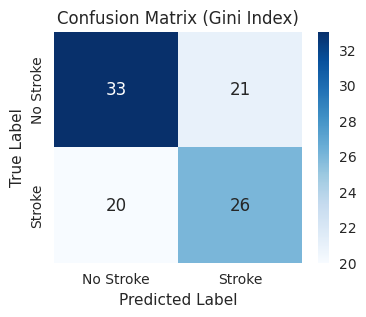

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the classifier using Gini index
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)

# Predict on the test set
y_pred_gini = clf_gini.predict(X_test)

%pip install matplotlib seaborn

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Gini Index)')
plt.show()

The false positives and false negatives are quite high, indicating a significant number of misclassifications. This might suggest the model has difficulties distinguishing between the classes under these conditions, which might be due to various factors like feature selection or the decision tree depth.

Gini Index Results:
Accuracy: 0.6133333333333333
Confusion Matrix:
 [[49 26]
 [32 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.65      0.63        75
           1       0.62      0.57      0.60        75

    accuracy                           0.61       150
   macro avg       0.61      0.61      0.61       150
weighted avg       0.61      0.61      0.61       150



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


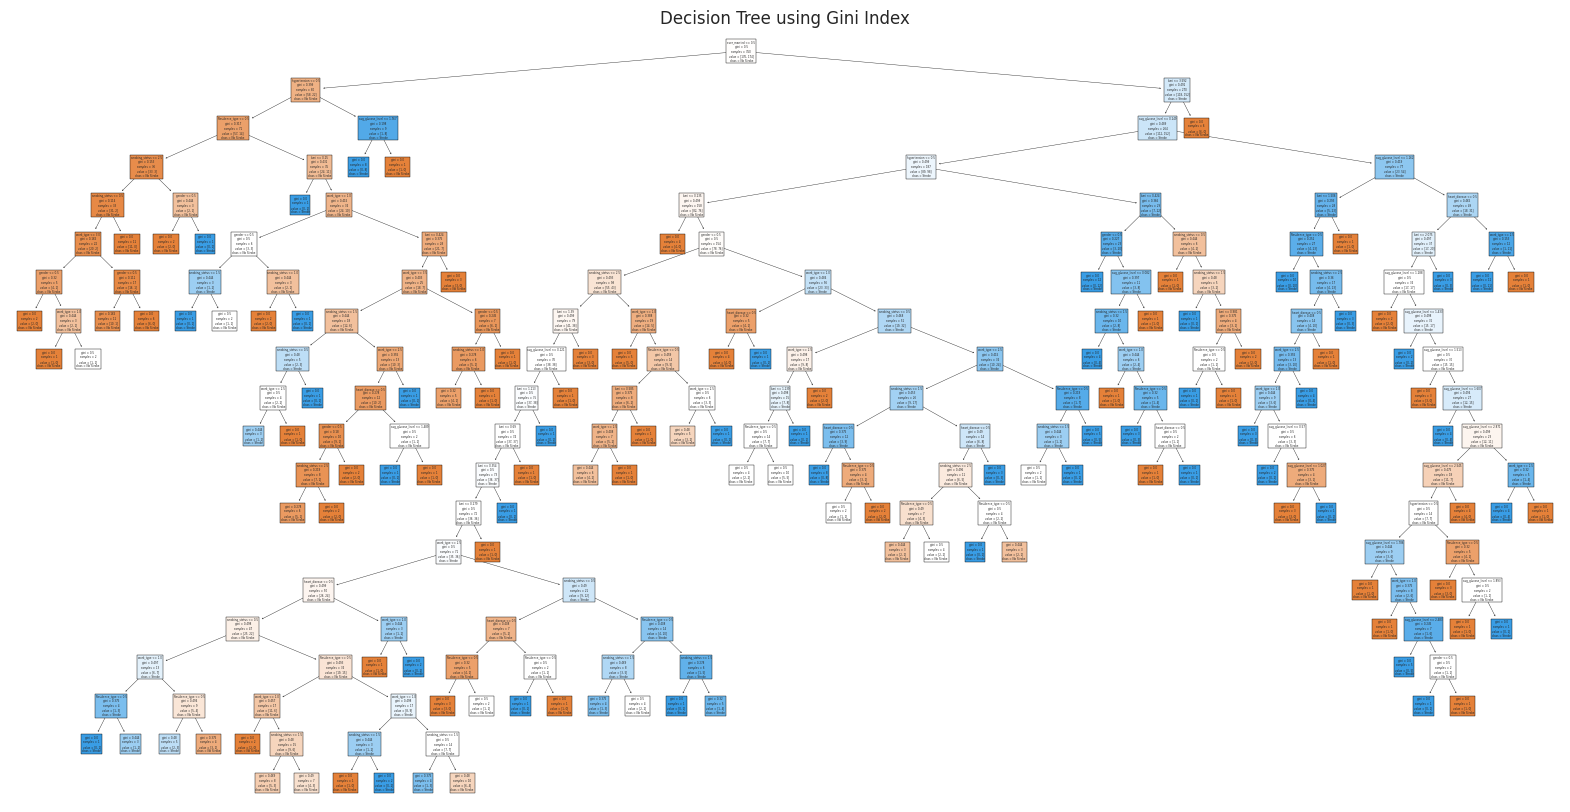

In [37]:

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and train the classifier using Gini index
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)

# Predict on the test set
y_pred_gini = clf_gini.predict(X_test)

# Evaluate the model's performance
print("Gini Index Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gini))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gini))
print("Classification Report:\n", classification_report(y_test, y_pred_gini))

plt.figure(figsize=(20,10))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['No Stroke', 'Stroke'])
plt.title('Decision Tree using Gini Index')
plt.show()

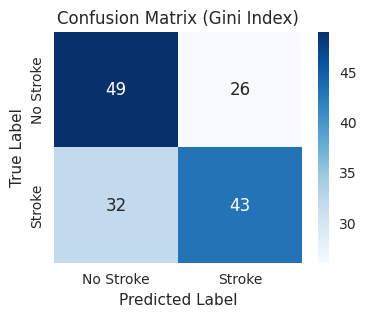

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3
                                                , random_state=42)

# Instantiate and train the classifier using Gini index
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)

# Predict on the test set
y_pred_gini = clf_gini.predict(X_test)

%pip install matplotlib seaborn

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Gini Index)')
plt.show()

This setup exhibits a slightly better performance in terms of true positives compared to the first scenario. However, the false negatives are quite high, which could lead to issues in cases where failing to detect positive instances has serious implications. 

#### IG entropy

Entropy Results:
Accuracy: 0.7
Confusion Matrix:
 [[20  6]
 [ 9 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.77      0.73        26
           1       0.71      0.62      0.67        24

    accuracy                           0.70        50
   macro avg       0.70      0.70      0.70        50
weighted avg       0.70      0.70      0.70        50



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


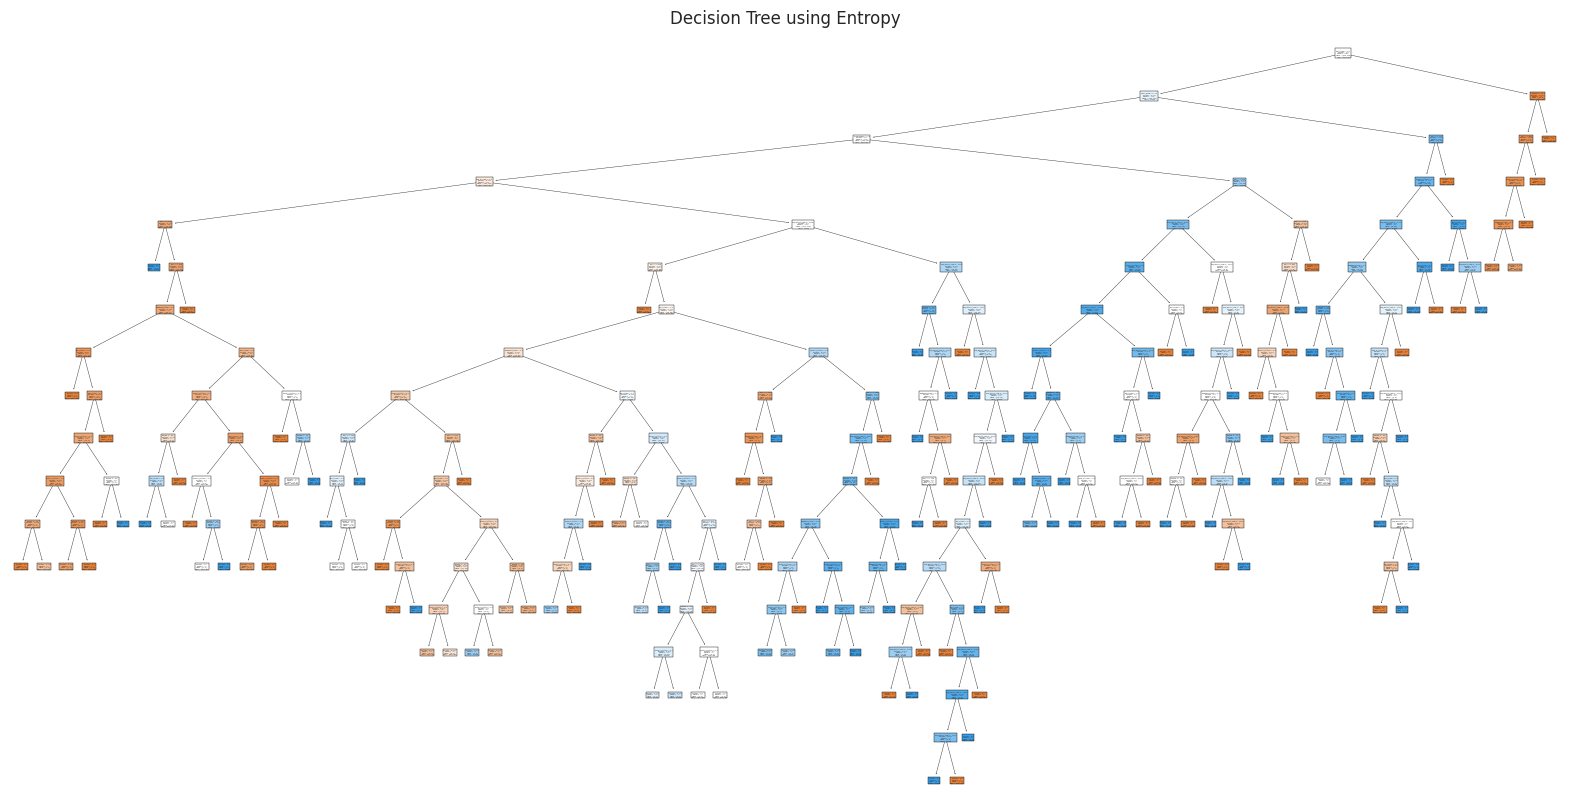

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Instantiate and train the classifier using entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)

# Predict on the test set
y_pred_entropy = clf_entropy.predict(X_test)

# Evaluate the model's performance
print("Entropy Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))
print("Classification Report:\n", classification_report(y_test, y_pred_entropy))

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['No Stroke', 'Stroke'])
plt.title('Decision Tree using Entropy')
plt.show()


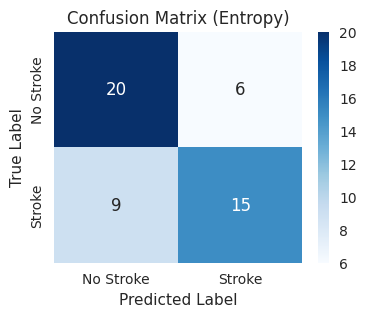

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Instantiate and train the classifier using Gini index
clf_gini = DecisionTreeClassifier(criterion='entropy')
clf_gini.fit(X_train, y_train)

# Predict on the test set
y_pred_gini = clf_gini.predict(X_test)

%pip install matplotlib seaborn

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Entropy)')
plt.show()

This configuration shows the highest accuracy of the three and a marked improvement over the equivalent Gini scenario. With fewer false positives and false negatives, it indicates that the model may be better at generalizing from the training data to unseen test data in this setup. However, the smaller size of the test set may still pose limitations on the robustness of these results.

Entropy Results:
Accuracy: 0.57
Confusion Matrix:
 [[32 22]
 [21 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.59      0.60        54
           1       0.53      0.54      0.54        46

    accuracy                           0.57       100
   macro avg       0.57      0.57      0.57       100
weighted avg       0.57      0.57      0.57       100



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


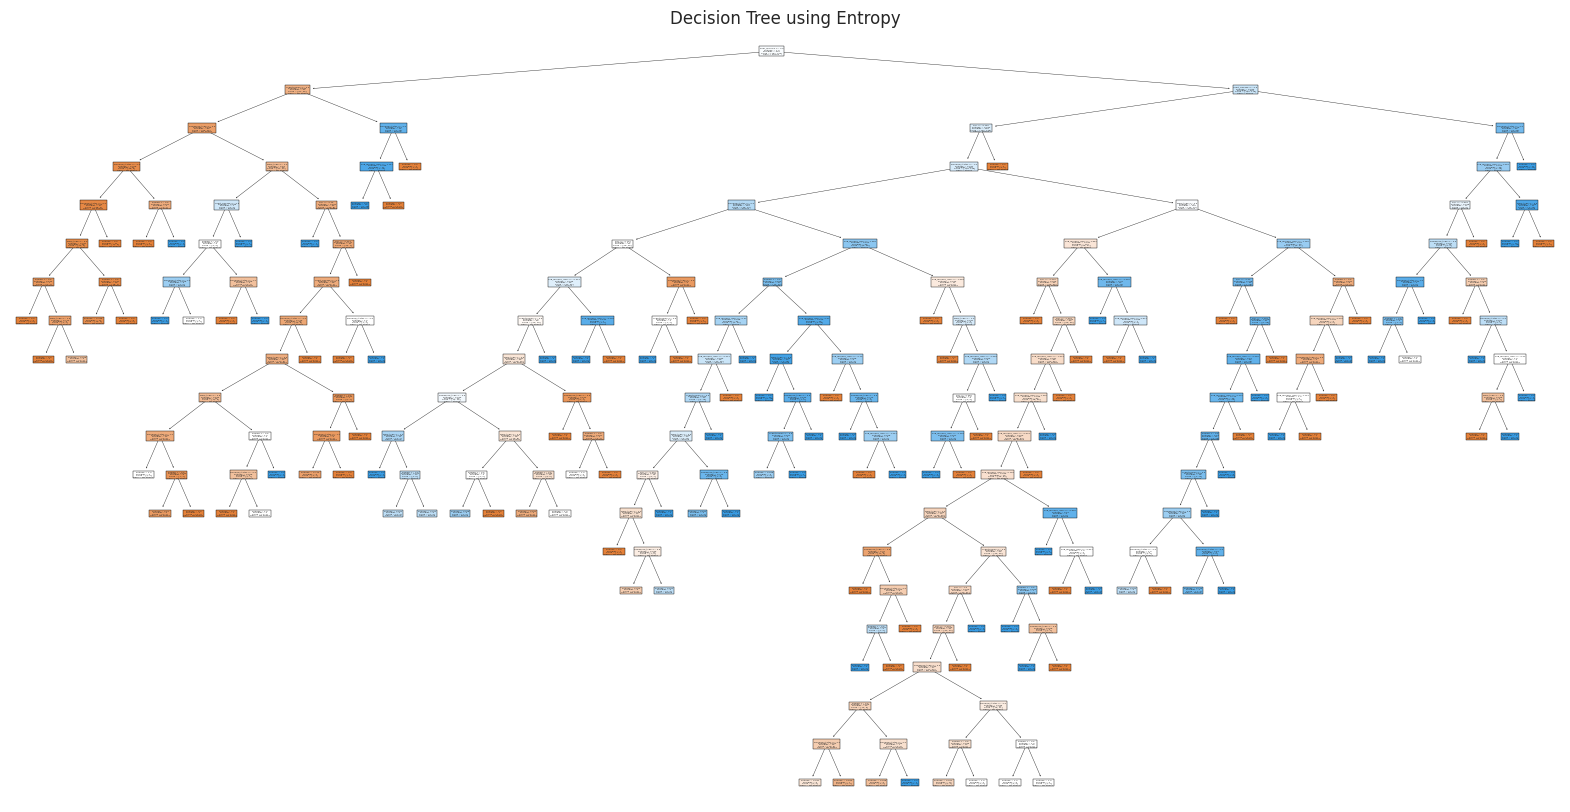

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the classifier using entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)

# Predict on the test set
y_pred_entropy = clf_entropy.predict(X_test)

# Evaluate the model's performance
print("Entropy Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))
print("Classification Report:\n", classification_report(y_test, y_pred_entropy))

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['No Stroke', 'Stroke'])
plt.title('Decision Tree using Entropy')
plt.show()


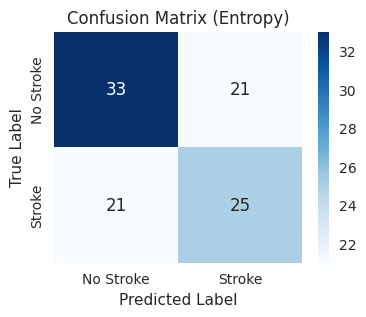

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the classifier using Gini index
clf_gini = DecisionTreeClassifier(criterion='entropy')
clf_gini.fit(X_train, y_train)

# Predict on the test set
y_pred_gini = clf_gini.predict(X_test)

%pip install matplotlib seaborn

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Entropy)')
plt.show()

The accuracy here is slightly less than what was seen with the Gini index for the same training-test split. Both types of errors (false positives and false negatives) are equal, suggesting that the model might not be effectively distinguishing between the classes. 

Entropy Results:
Accuracy: 0.64
Confusion Matrix:
 [[51 24]
 [30 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.68      0.65        75
           1       0.65      0.60      0.63        75

    accuracy                           0.64       150
   macro avg       0.64      0.64      0.64       150
weighted avg       0.64      0.64      0.64       150



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


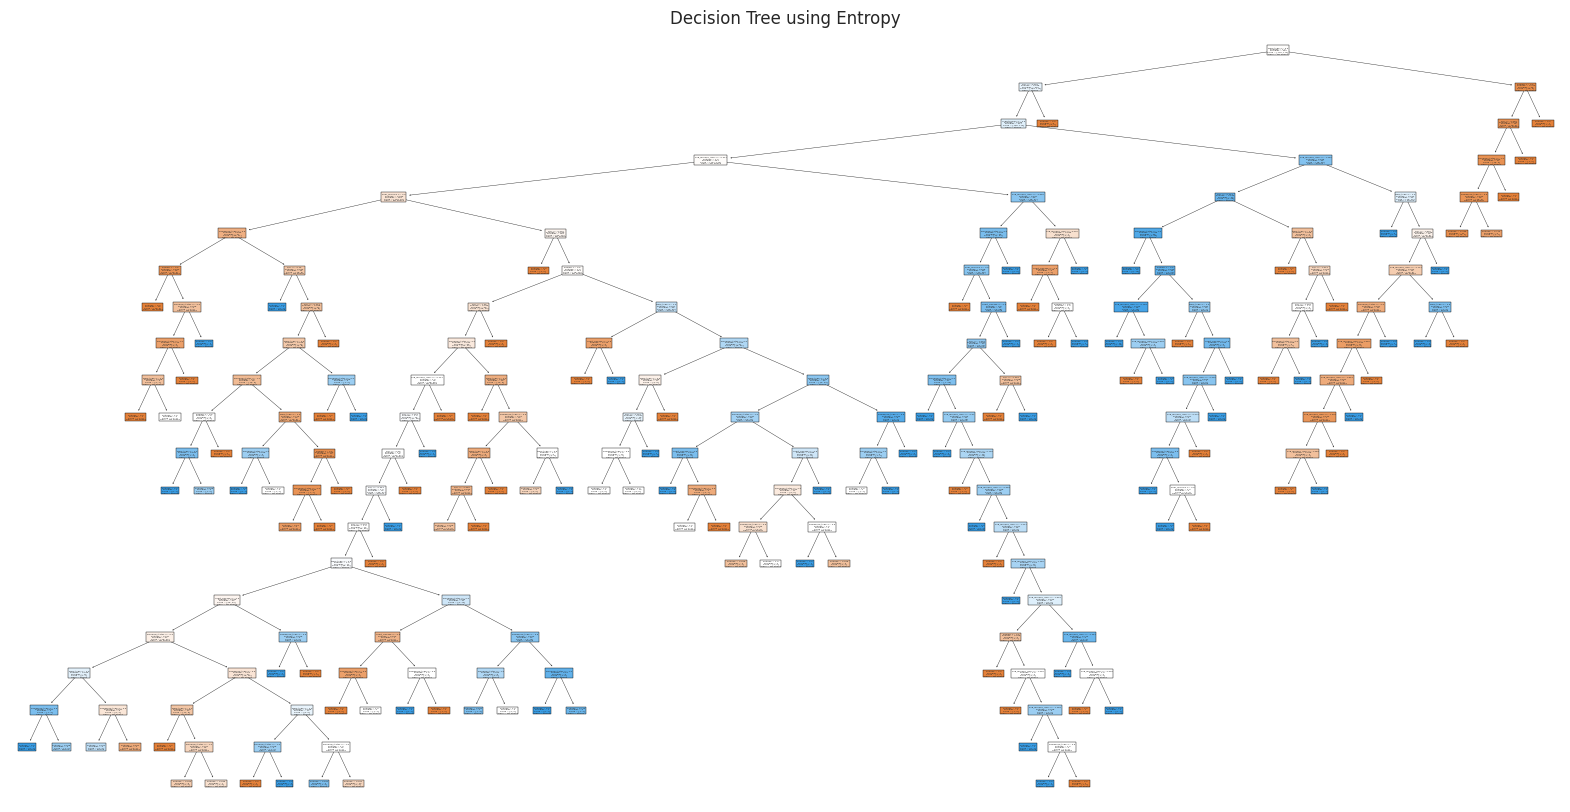

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and train the classifier using entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)

# Predict on the test set
y_pred_entropy = clf_entropy.predict(X_test)

# Evaluate the model's performance
print("Entropy Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))
print("Classification Report:\n", classification_report(y_test, y_pred_entropy))

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['No Stroke', 'Stroke'])
plt.title('Decision Tree using Entropy')
plt.show()


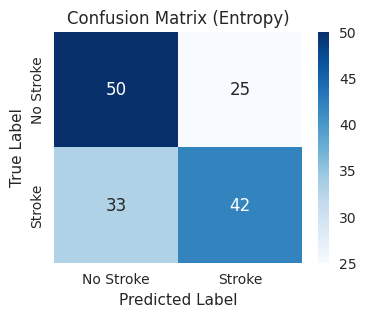

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and train the classifier using Gini index
clf_gini = DecisionTreeClassifier(criterion='entropy')
clf_gini.fit(X_train, y_train)

# Predict on the test set
y_pred_gini = clf_gini.predict(X_test)

%pip install matplotlib seaborn

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Entropy)')
plt.show()

This setup shows a better balance of accuracy compared to the 80% training model, with a slight improvement over the Gini scenario at the same split. The higher number of true positives suggests better sensitivity or recall. However, the false negatives and positives are still relatively high, indicating potential overfitting or inadequate model tuning.

Gini Index performed better in the 80% training scenario, but it did not keep up with the Entropy in the 70% and 90% training scenarios where Entropy showed better accuracy and error balance.
Entropy consistently shows a trend of improvement or comparable performance as the size of the training set increases. It achieves the highest accuracy of 0.7 in the 90% training scenario, which is the best individual accuracy among all tested configurations.

In Conclusion, The Entropy criterion proves to be the best overall choice among the tested configurations, particularly showing its strength in larger training sets (70% and 90% training). It generally provides higher accuracy and better error management, making it the preferable choice for these decision tree models.

#### 6.2 Clustring:

In the clustering analysis, we applied the k-means algorithm to explore inherent groupings within the dataset based on health characteristics, independent of the stroke outcome. This unsupervised method was used to identify patterns and potential risk factors associated with stroke incidence, which could be pivotal for preventative strategies.

Choosing the number of clusters k randomly  which are k=3,4,5.

The silhouette scores suggest that as the number of clusters increases from 3 to 5, the average silhouette width decreases, indicating that the separation between clusters worsens. This is important because it suggests that higher numbers of clusters might start to capture noise or less meaningful distinctions between data points.

The Optimal Cluster results indicate that k provides a good balance with the highest silhouette score and a reasonable WSS, suggesting distinct and meaningful groupings. Although k=8 was suggested as optimal by the silhouette method, the lower silhouette width compared to k=3 might mean less clear separation between more numerous clusters.


Both methods provide valuable insights but in different contexts. Classification directly aids in predictive accuracy regarding stroke occurrence, while clustering helps in understanding broader patterns and risk factor distributions within the population

In summary, classification and clustering are techniques that play significant roles in machine learning. However, for our specific problem and dataset, it is advisable to opt for classification rather than clustering. This recommendation stems from the fact that classification is better suited for predicting whether an individual will experience a stroke, which aligns with our objective. While clustering provides insights into how patients can be grouped based on shared characteristics and can identify common attributes for each group by comparing them to our ground truth (had a stroke or not), it does not have the capability to predict the likelihood of an individual suffering a stroke.


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

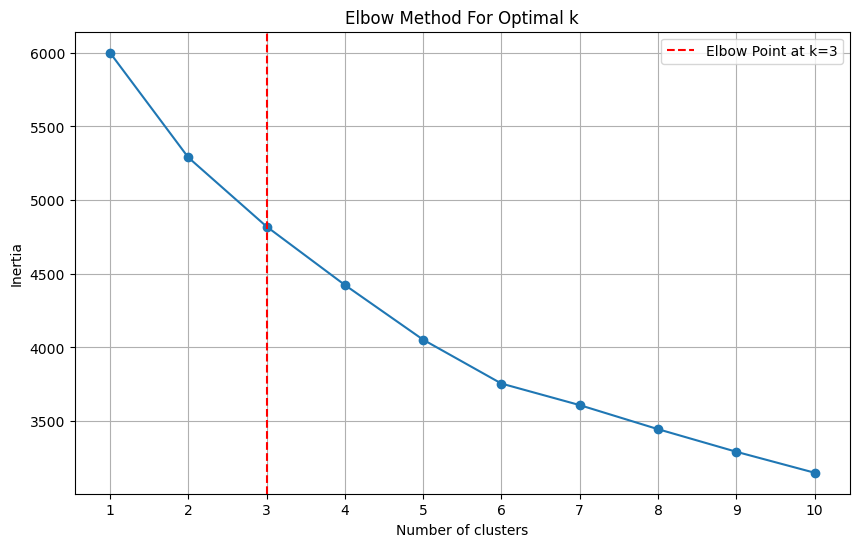

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Processed_StrokeDS.csv')

# Selecting numerical columns only, adjust as necessary
numerical_data = data.select_dtypes(include=[float, int])

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_data)

# Calculating the inertia for a range of cluster numbers
inertia = []
cluster_range = range(1, 11)  # Testing 1 to 10 clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)

# Manually add a vertical line at the elbow point
# Update 'elbow_point' to your chosen cluster number based on the plot
elbow_point = 3
plt.axvline(x=elbow_point, color='r', linestyle='--', label='Elbow Point at k={}'.format(elbow_point))
plt.legend()

plt.show()


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Average Silhouette Width for k=3: 0.4268


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

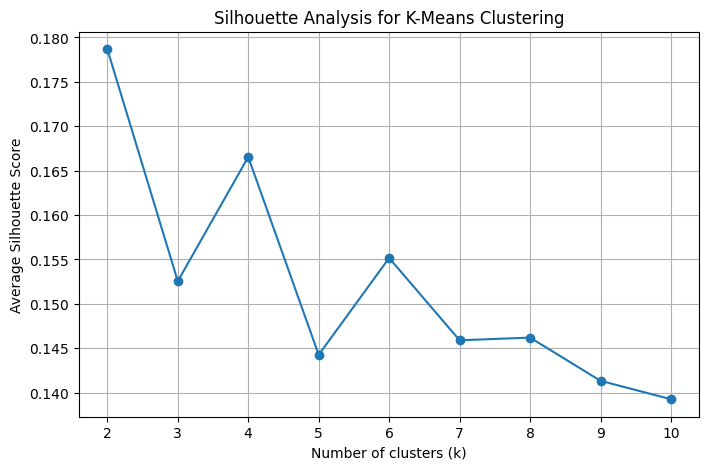

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# Define the number of clusters (k)
k = 3

# Compute silhouette score for k=3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)

print(f"Average Silhouette Width for k={k}: {silhouette_avg:.4f}")


# Load the dataset
df = pd.read_csv('Processed_StrokeDS.csv')

# Extract feature matrix X (assuming all columns except the target variable)
X = df.drop(columns=['stroke'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range of clusters (k)
k_values = range(2, 11)

# List to store silhouette scores
silhouette_avg_values = []

# Perform k-means clustering with different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_avg_values.append(silhouette_avg)

# Plot the silhouette scores for different values of k
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Average Silhouette Width for k=4: 0.5941


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

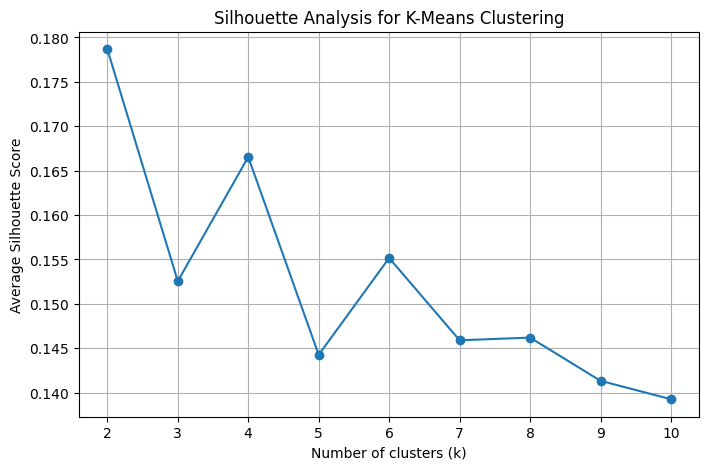

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# Define the number of clusters (k)
k = 4

# Compute silhouette score for k=3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)

print(f"Average Silhouette Width for k={k}: {silhouette_avg:.4f}")


# Load the dataset
df = pd.read_csv('Processed_StrokeDS.csv')

# Extract feature matrix X (assuming all columns except the target variable)
X = df.drop(columns=['stroke'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range of clusters (k)
k_values = range(2, 11)

# List to store silhouette scores
silhouette_avg_values = []

# Perform k-means clustering with different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_avg_values.append(silhouette_avg)

# Plot the silhouette scores for different values of k
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Average Silhouette Width for k=5: 0.5751


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

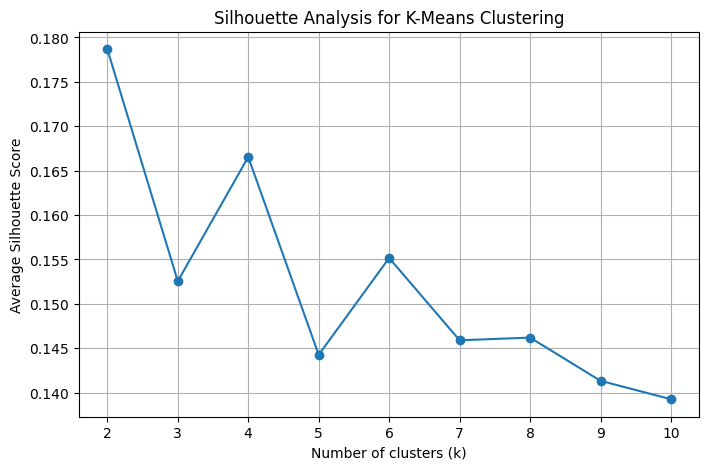

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# Define the number of clusters (k)
k = 5

# Compute silhouette score for k=3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)

print(f"Average Silhouette Width for k={k}: {silhouette_avg:.4f}")


# Load the dataset
df = pd.read_csv('Processed_StrokeDS.csv')

# Extract feature matrix X (assuming all columns except the target variable)
X = df.drop(columns=['stroke'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range of clusters (k)
k_values = range(2, 11)

# List to store silhouette scores
silhouette_avg_values = []

# Perform k-means clustering with different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_avg_values.append(silhouette_avg)

# Plot the silhouette scores for different values of k
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

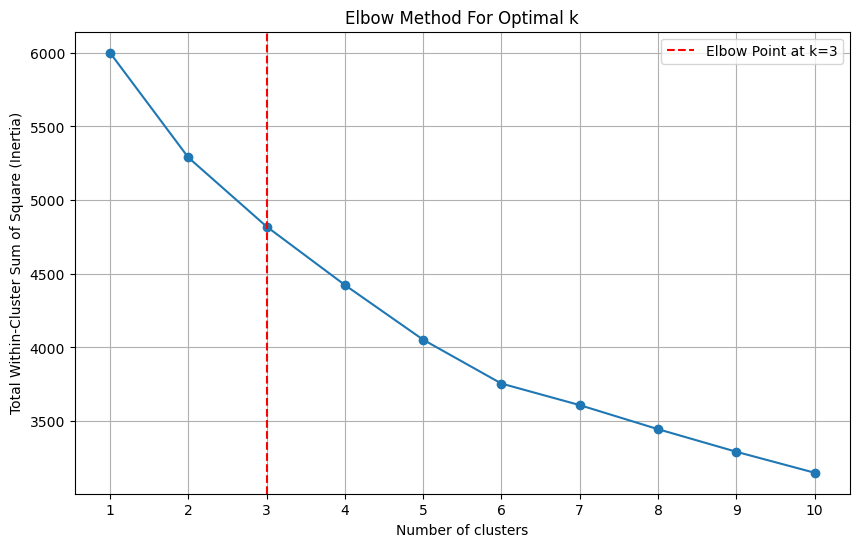

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

numerical_data = data.select_dtypes(include=[float, int])

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_data)

# Calculating the inertia for a range of cluster numbers
inertia = []
cluster_range = range(1, 11)  # Testing 1 to 10 clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Total Within-Cluster Sum of Square (Inertia)')
plt.xticks(cluster_range)
plt.grid(True)


elbow_point = 3  
plt.axvline(x=elbow_point, color='red', linestyle='--', label='Elbow Point at k={}'.format(elbow_point))
plt.legend()

plt.show()


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

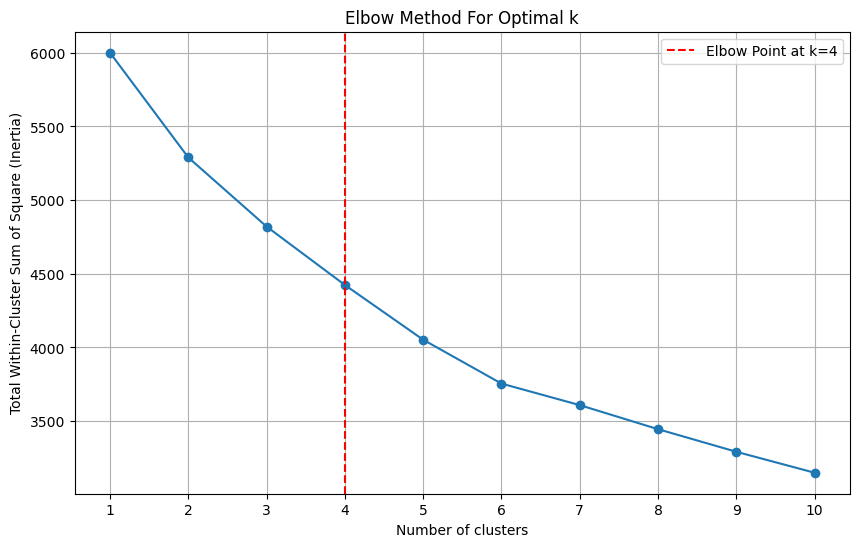

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

numerical_data = data.select_dtypes(include=[float, int])

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_data)

# Calculating the inertia for a range of cluster numbers
inertia = []
cluster_range = range(1, 11)  # Testing 1 to 10 clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Total Within-Cluster Sum of Square (Inertia)')
plt.xticks(cluster_range)
plt.grid(True)


elbow_point = 4 
plt.axvline(x=elbow_point, color='red', linestyle='--', label='Elbow Point at k={}'.format(elbow_point))
plt.legend()

plt.show()


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

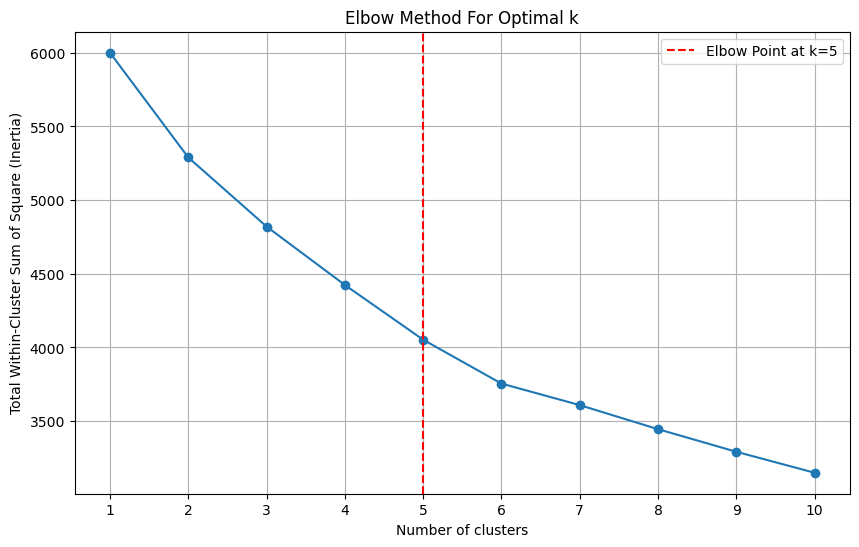

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

numerical_data = data.select_dtypes(include=[float, int])

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_data)

# Calculating the inertia for a range of cluster numbers
inertia = []
cluster_range = range(1, 11)  # Testing 1 to 10 clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Total Within-Cluster Sum of Square (Inertia)')
plt.xticks(cluster_range)
plt.grid(True)


elbow_point = 5  
plt.axvline(x=elbow_point, color='red', linestyle='--', label='Elbow Point at k={}'.format(elbow_point))
plt.legend()

plt.show()


In [16]:
df=pd.read_csv("Processed_StrokeDS.csv")
X = df
X = df.drop(columns=['id','stroke'])


In [17]:
from sklearn.preprocessing import StandardScaler

features=df.drop(df.columns[0], axis=1)

scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)

df_scaled=pd.DataFrame(scaled_features, columns=features.columns)



In [18]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

np.random.seed (8953)

kmeans=KMeans(n_clusters=3,random_state=8953)
kmeans_result=kmeans.fit(df_scaled)

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


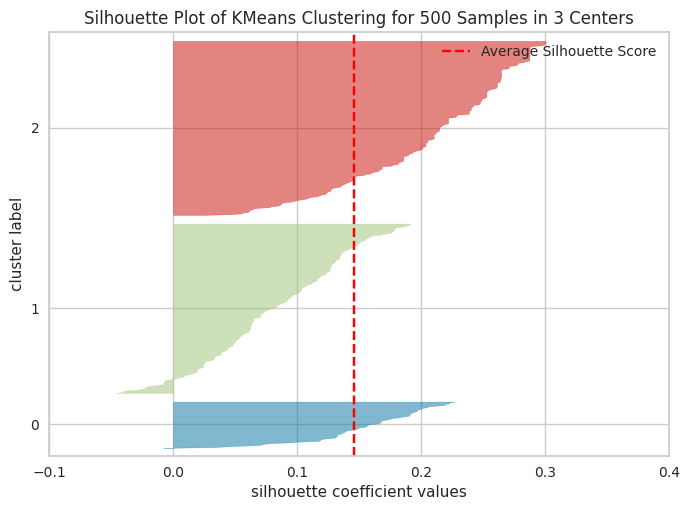

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 500 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
%pip install yellowbrick
from yellowbrick. cluster import SilhouetteVisualizer 
from sklearn.cluster import KMeans
visualizer = SilhouetteVisualizer (kmeans, colors='yellowbrick')
visualizer. fit(df_scaled)
visualizer.show()

In this silhouette plot, cluster 0 has many points with a low silhouette score, including negative values, suggesting these points might be better suited in a different cluster or that the separation between this and other clusters is not well defined. On the other hand, clusters 1 and 2 seem to perform better with higher silhouette scores overall, suggesting that the points are more appropriately grouped.

The average silhouette score for all the samples is marked by the dashed red line. In this case, the line appears to be just above 0.2, which suggests that the clusters are, on average, only moderately distinct from each other.

Overall, the clustering configuration with 3 clusters for this particular dataset may not be optimal, as indicated by the significant number of samples with low or negative silhouette scores in cluster 0. It might be beneficial to try different numbers of clusters.

In [20]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

np.random.seed (8953)

kmeans=KMeans(n_clusters=4,random_state=8953)
kmeans_result=kmeans.fit(df_scaled)

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


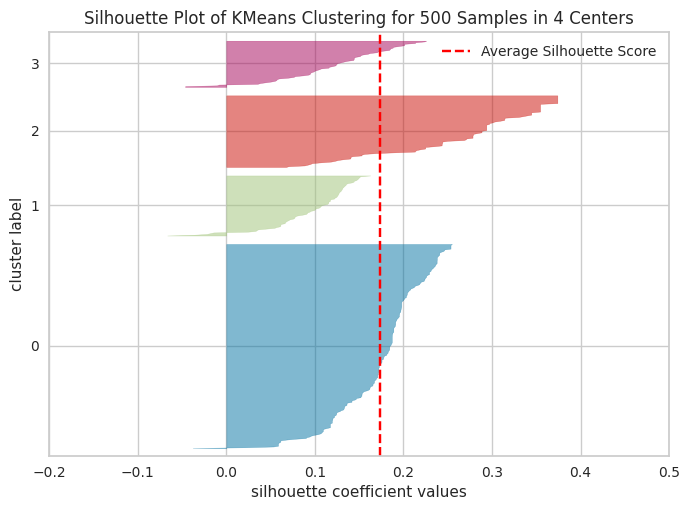

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 500 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
%pip install yellowbrick
from yellowbrick. cluster import SilhouetteVisualizer 
from sklearn.cluster import KMeans
visualizer = SilhouetteVisualizer (kmeans, colors='yellowbrick')
visualizer. fit(df_scaled)
visualizer.show()

In [22]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

np.random.seed (8953)

kmeans=KMeans(n_clusters=5,random_state=8953)
kmeans_result=kmeans.fit(df_scaled)

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


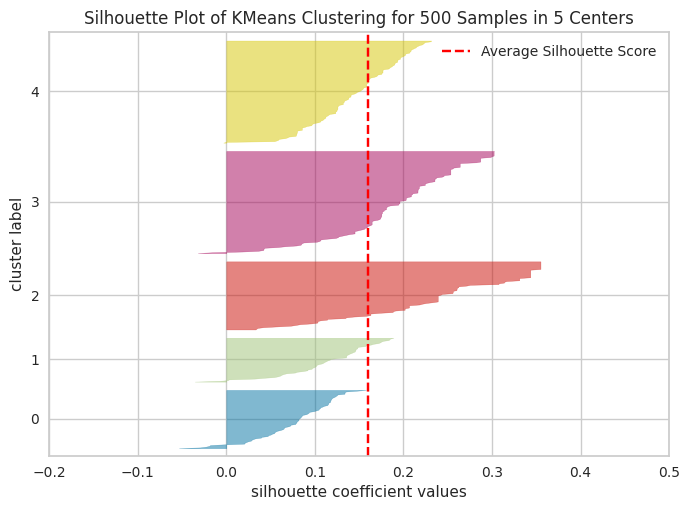

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 500 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
%pip install yellowbrick
from yellowbrick. cluster import SilhouetteVisualizer 
from sklearn.cluster import KMeans
visualizer = SilhouetteVisualizer (kmeans, colors='yellowbrick')
visualizer. fit(df_scaled)
visualizer.show()


|                                   |  K=3        | K=4                | K=5             |
|-----------------------------------|-------------|--------------------|-----------------|
| Average Silhouette width          |    0.6156   |   0.5941           | 0.5751          | 
|                                   |             |                    |                 |
|Total within-cluster sum of square |  4820.3     |   4423.9           |    4052.5       | 



Based on the analysis of the clustering results for each value of k in terms of Total Within-Cluster Sum of Squares (WSS) and Average Silhouette Width:

k=3 Average Silhouette Width stands out as the highest among the three values of k , implying that the clusters are distinct and internally cohesive. Nevertheless, the Within-Cluster Sum of Squares (WSS) also registers as the highest, suggesting that the points within each cluster are not as tightly packed as they could be in alternative clusterings.

Comparing k=4 to k=3 it shows reduction in WSS, meaning the clusters are tighter (points are closer within clusters), but the Average Silhouette Width is higher indicating slightly less separation between the clusters.

k=5 had the lowest WSS among the three, which signifies the tightest clustering (points are closest within their respective clusters). However, the Average Silhouette Width is also the lowest, implying the worst separation among the clusters compared to the pervious two k's. 

Thus, based on these metrics k=3 appears to be the best choice because it balances a reasonably low (WSS) with the highest Average Silhouette Width, suggesting good cluster cohesion and separation. 

# 7. findings

The 90%-10% model is considered the best due to its highest accuracy and lower rates of false positives and negatives in both Gini Index and Entropy measures, suggesting it most effectively leverages a larger dataset to learn and generalize well without overt signs of overfitting, although the smaller test size warrants further validation to ensure robustness across broader data.

Important Attributes: Age, marital status (ever married), and hypertension are identified as important attributes in the analysis.
Age and Stroke: Analysis suggests a correlation between older age and a higher probability of experiencing a stroke.
Hypertension and Stroke: Hypertension plays a significant role in decision-making and classification within the tree structure. The analysis reveals that individuals with elevated levels of hypertension are more prone to experiencing a stroke.

Classification or Clustering?

In conclusion, classification and clustering methods both serve an important part in machine learning. When considering our problem and dataset, it is recommended to utilize classification over clustering. This is due to the fact that classification is more suitable for predicting whether an individual will experience a stroke or not, which is our goal. Clustering can teach us more about our data and how the patients can be grouped based on common features, and by evaluating it to our ground truth (suffered a stroke or not) it can point out common attributes for each group, but it cannot predict whether an individual may suffer a stroke or not.

## 8. References:

- [1] Fedorov, E. (2020). Stroke Prediction Dataset. [Online]. Available:https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 
- [2] V. Tamma, C. Cotta, and J. Duggan, Data Science for Healthcare: Methodologies and Applications. [Online]. Available: https://www.springer.com/gp/book/9783030435609
- [3] [1] "DAFljjxmyZw" video, Jan. 14, 2022. [Online]. Available: https://youtu.be/DAFljjxmyZw?si=yp8DjS4f-JqHipYD